In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.shape

(365, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [6]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return lower_bound, upper_bound  

Using lemonade.csv dataset and focusing on continuous variables:

1. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [7]:
df_lower_bound = get_lower_and_upper_bounds(df[['Temperature','Rainfall','Flyers','Price','Sales']])[0]
df_lower_bound

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

In [8]:
df[['Temperature','Rainfall','Flyers','Price','Sales']].min()

Temperature    15.1
Rainfall        0.4
Flyers        -38.0
Price           0.5
Sales           7.0
dtype: float64

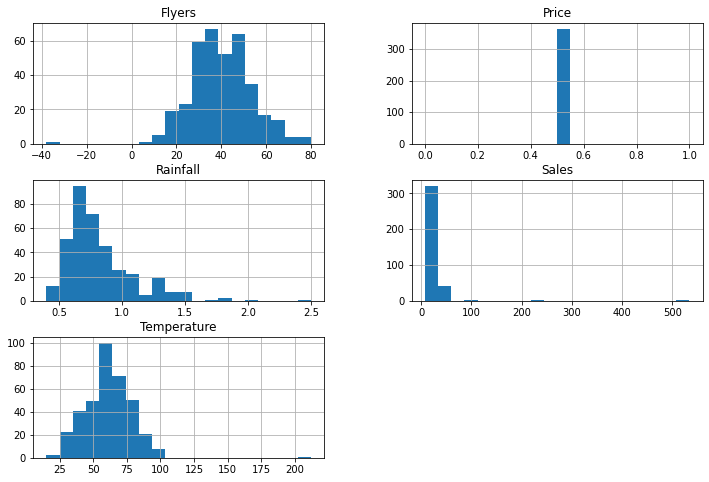

In [9]:
df.hist(figsize=(12,8), bins=20)
plt.show()

In [10]:
# Determine temperature boundaries using 1.5 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Temperature)

In [11]:
low_outliers = df.Temperature[df.Temperature < lower_bound]

In [12]:
# this lower outliners make sense and should be kept
low_outliers

364    15.1
Name: Temperature, dtype: float64

In [13]:
# Determine rainfall boundaries using 1.5 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Rainfall)

In [14]:
# there is no lower outliners by using 1.5 IQR Range rule
low_outliers = df.Rainfall[df.Rainfall < lower_bound]
low_outliers

Series([], Name: Rainfall, dtype: float64)

In [15]:
# Determine Flyers boundaries using 1.5 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Flyers)

In [16]:
# there is one lower outliners of Flyers by using 1.5 IQR Range rule
low_outliers = df.Flyers[df.Flyers < lower_bound]
low_outliers

324   -38
Name: Flyers, dtype: int64

In [17]:
# Determine Sales boundaries using 1.5 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Sales)

In [18]:
# there is no lower outliners of Sales by using 1.5 IQR Range rule
low_outliers = df.Sales[df.Sales < lower_bound]
low_outliers

Series([], Name: Sales, dtype: int64)

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [19]:
# Determine temperature boundaries using 1.5 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Temperature)
upper_outliers = df.Temperature[df.Temperature > upper_bound]
# this is one upper outliners by using 1.5 IQR Range rule
print(upper_bound)
upper_outliers

104.7


41    212.0
Name: Temperature, dtype: float64

In [20]:
# Determine rainfall boundaries using 1.5 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Rainfall)
upper_outliers = df.Rainfall[df.Rainfall > upper_bound]
# there are 28 upper outliners by using 1.5 IQR Range rule, probably doesnt make sense 
print(upper_bound)
len(upper_outliers)

1.3


28

In [21]:
# Determine flyers boundaries using 1.5 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Flyers)
upper_outliers = df.Flyers[df.Flyers > upper_bound]
# there are 2 upper outliners by using 1.5 IQR Range rule
print(upper_bound)
upper_outliers

76.0


166    77
194    80
Name: Flyers, dtype: int64

In [22]:
# Determine sales boundaries using 1.5 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Sales)
upper_outliers = df.Sales[df.Sales > upper_bound]
# there are 4 upper outliners by using 1.5 IQR Range rule. it kind of make sense 
print(upper_bound)
upper_outliers

45.0


183    235
184    534
185     99
258     87
Name: Sales, dtype: int64

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [23]:
def get_lower_and_upper_bounds(series, multiplier=3):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return lower_bound, upper_bound 

In [24]:
# Determine temperature boundaries using 3 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Temperature)
low_outliers = df.Temperature[df.Temperature < lower_bound]
# this is no lower outliners by using 3 IQR range rule
print(lower_bound)
low_outliers

-16.299999999999997


Series([], Name: Temperature, dtype: float64)

In [25]:
# Determine rainfall boundaries using 3 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Rainfall)
low_outliers = df.Rainfall[df.Rainfall < lower_bound]
# this is no lower outliners by using 3 IQR range rule
print(lower_bound)
low_outliers

-0.13


Series([], Name: Rainfall, dtype: float64)

In [26]:
# Determine flyers boundaries using 3 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Flyers)
low_outliers = df.Flyers[df.Flyers < lower_bound]
# this is one lower outliners by using 3 IQR range rule, using 3 IQR range rule for this variable make sense 
print(lower_bound)
low_outliers

-23.0


324   -38
Name: Flyers, dtype: int64

In [27]:
# Determine sales boundaries using 3 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Sales)
low_outliers = df.Sales[df.Sales < lower_bound]
# this is no lower outliners by using 3 IQR range rule
print(lower_bound)
low_outliers

-10.0


Series([], Name: Sales, dtype: int64)

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [28]:
# Determine temperature boundaries using 3 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Temperature)
upper_outliers = df.Temperature[df.Temperature > upper_bound]
# this is one upper outliners by using 3 IQR Range rule, it make senses for this variable
print(upper_bound)
upper_outliers

137.7


41    212.0
Name: Temperature, dtype: float64

In [29]:
# Determine rainfall boundaries using 3 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Rainfall)
upper_outliers = df.Rainfall[df.Rainfall > upper_bound]
# there are 4 upper outliners by using 3 IQR Range rule, this one make more sense than using 1.5 IQR range rule
print(upper_bound)
upper_outliers

1.69


0      2.00
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [30]:
# Determine flyers boundaries using 3 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Flyers)
upper_outliers = df.Flyers[df.Flyers > upper_bound]
# there is none upper outliners by using 3 IQR Range rule
print(upper_bound)
upper_outliers

103.0


Series([], Name: Flyers, dtype: int64)

In [31]:
# Determine sales boundaries using 3 IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Sales)
upper_outliers = df.Sales[df.Sales > upper_bound]
# there are 4 upper outliners by using 3 IQR Range rule. Noticed that the 4 outlines are shown 
# both with using 1.5 and 3 IQR Range rule, these four are definitely can be counted as outliners 
print(upper_bound)
upper_outliers

60.0


183    235
184    534
185     99
258     87
Name: Sales, dtype: int64

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

 - Use a 2 sigma decision rule to isolate the outliers.
 - Do these make sense?
 - Should certain outliers be kept or removed?

In [32]:
# get location of temperature outliner 
df.loc[39:44]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
39,2/9/17,Thursday,42.7,1.00,39,0.5,19
40,2/10/17,Friday,50.0,0.91,40,0.5,20
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
42,2/12/17,Sunday,55.6,0.83,41,0.5,22
43,2/13/17,Monday,46.4,1.11,34,0.5,18
44,2/14/17,Tuesday,47.7,0.95,35,0.5,19


In [33]:
# Use back-filled method to replace the temperature outliner 212 with 55.6
df.Temperature.loc[41] = 55.6

In [34]:
df.loc[39:44]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
39,2/9/17,Thursday,42.7,1.00,39,0.5,19
40,2/10/17,Friday,50.0,0.91,40,0.5,20
41,2/11/17,Saturday,55.6,0.91,35,0.5,21
42,2/12/17,Sunday,55.6,0.83,41,0.5,22
43,2/13/17,Monday,46.4,1.11,34,0.5,18
44,2/14/17,Tuesday,47.7,0.95,35,0.5,19


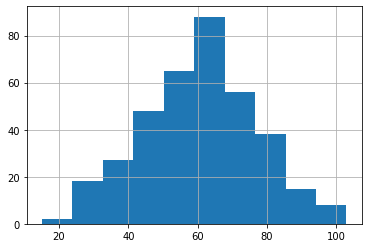

In [35]:
df.Temperature.hist()

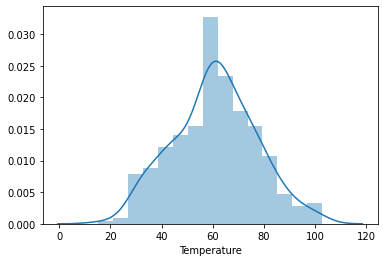

In [36]:
sns.distplot(df.Temperature)

In [37]:
x = df.Temperature
mean = df.Temperature.mean()
std = df.Temperature.std()
# Calculate the z-score 
zscores = (x - mean) / std
print(mean)
print(std)

60.79616438356169
16.264945336092914


In [38]:
# temperatures that fall beyond two standard deviation from mean, in other words, there is less than 5 percent chance
# that those data ponits are fallen into the distribution area 
df.Temperature[zscores.abs() >= 2]

0       27.0
5       25.3
166     99.3
171     94.3
176    102.6
181    102.9
182     93.4
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [39]:
# get the location of flyers outliner 
df.loc[322:326]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
322,11/19/17,Sunday,55.9,0.87,34,0.5,23
323,11/20/17,Monday,55.6,0.87,41,0.5,22
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
325,11/22/17,Wednesday,48.7,1.00,40,0.5,19
326,11/23/17,Thursday,51.9,0.87,47,0.5,23


In [40]:
# Use forward-filled method to replace the Flyer outliner -38 with 41
df.Flyers.loc[324] = 41

In [41]:
df.loc[322:326]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
322,11/19/17,Sunday,55.9,0.87,34,0.5,23
323,11/20/17,Monday,55.6,0.87,41,0.5,22
324,11/21/17,Tuesday,47.0,0.95,41,0.5,20
325,11/22/17,Wednesday,48.7,1.00,40,0.5,19
326,11/23/17,Thursday,51.9,0.87,47,0.5,23


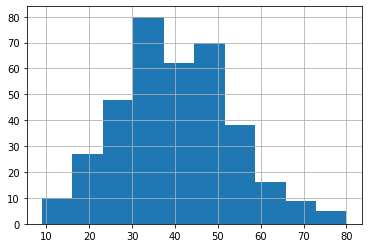

In [42]:
df.Flyers.hist()

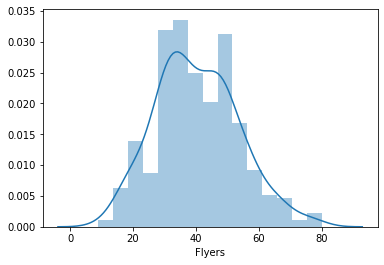

In [43]:
sns.distplot(df.Flyers)

In [44]:
x = df.Flyers
mean = df.Flyers.mean()
std = df.Flyers.std()
# Calculate the z-score 
zscores = (x - mean) / std
print(mean)
print(std)

40.320547945205476
13.162915761611591


In [45]:
# flyers that fall beyond two standard deviation from mean, in other words, there is less than 5 percent chance
# that those data ponits are fallen into the distribution area 
df.Flyers[zscores.abs() >= 2]

162    67
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
338    11
364     9
Name: Flyers, dtype: int64

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [46]:
x = df.Temperature
mean = df.Temperature.mean()
std = df.Temperature.std()
# Calculate the z-score 
zscores = (x - mean) / std
print(mean)
print(std)

60.79616438356169
16.264945336092914


In [47]:
# temperatures that fall beyond three standard deviation from mean, in other words, there is less than 1 percent chance
# that those data ponits are fallen into the distribution area 
df.Temperature[zscores.abs() >= 3]

Series([], Name: Temperature, dtype: float64)

Takeaway: There is no temperature outliners beyond three standard deviation from mean.

In [48]:
x = df.Flyers
mean = df.Flyers.mean()
std = df.Flyers.std()
# Calculate the z-score 
zscores = (x - mean) / std
print(mean)
print(std)

40.320547945205476
13.162915761611591


In [49]:
# flyers that fall beyond two standard deviation from mean, in other words, there is less than 5 percent chance
# that those data ponits are fallen into the distribution area 
df.Flyers[zscores.abs() >= 3]

194    80
Name: Flyers, dtype: int64

Takeaway: There is one flyer outliner beyond three standard deviation from mean.